# Aim
To find the best machine learning model for detecting credit card fraud in a certain dataset. An annual revenue of roughly 1.5 billion euros is generated by organised fraud organisations in Europe, according to a European Commission assessment. Machine learning models are used to choose a dataset from which to make reliable predictions of fraudulent transactions. Sampling methods are used in the implementation stages of machine learning models in the project.

## Some Information about fraud detection

In [ ]:
#!pip install termcolor
#!pip install xgboost

#Packages related to general operating system & warnings
import os 
# import warnings
# warnings.filterwarnings('ignore')
#Packages related to data importing, manipulation, exploratory data #analysis, data understanding
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
from termcolor import colored as cl # text customization
#Packages related to data visualizaiton
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
#Setting plot sizes and type of plot
plt.rc("font", size=14)
plt.rcParams['axes.grid'] = True
plt.figure(figsize=(6,3))
plt.gray()
from matplotlib.backends.backend_pdf import PdfPages
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics
from sklearn.impute import MissingIndicator, SimpleImputer
from sklearn.preprocessing import  PolynomialFeatures, KBinsDiscretizer, FunctionTransformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, LabelBinarizer, OrdinalEncoder

from sklearn.linear_model import LogisticRegression, LinearRegression, ElasticNet, Lasso, Ridge
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
from sklearn.ensemble import BaggingClassifier, BaggingRegressor,RandomForestClassifier,RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier,GradientBoostingRegressor, AdaBoostClassifier, AdaBoostRegressor 
from sklearn.svm import LinearSVC, LinearSVR, SVC, SVR
from xgboost import XGBClassifier

from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

<Figure size 432x216 with 0 Axes>

## Data Preparation

In [ ]:
data=pd.read_csv("/creditcard.csv")

In [ ]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


## Data PreProcessing

In [ ]:
Total_transactions = len(data)
normal = len(data[data.Class == 0])
fraudulent = len(data[data.Class == 1])
fraud_percentage = round(fraudulent/normal*100, 2)
print(cl('Total number of Trnsactions are {}'.format(Total_transactions), attrs = ['bold']))
print(cl('Number of Normal Transactions are {}'.format(normal), attrs = ['bold']))
print(cl('Number of fraudulent Transactions are {}'.format(fraudulent), attrs = ['bold']))
print(cl('Percentage of fraud Transactions is {}'.format(fraud_percentage), attrs = ['bold']))

Total number of Trnsactions are 284807
Number of Normal Transactions are 284315
Number of fraudulent Transactions are 492
Percentage of fraud Transactions is 0.17


Checking whether any coloum has NA values

In [ ]:
data.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

As per the count per column, we have no null values. Also, feature selection is not the case for this use case. Anyway, you can try applying feature selection mechanisms to check if the results are optimised.
I have observed in our data 28 features are transformed versions of PCA but the Amount is the original one. And, while checking the minimum and maximum is in the amount — I found the difference is huge that can deviate our result.

In [ ]:
min(data.Amount),max(data.Amount)

(0.0, 25691.16)

In [ ]:
sc = StandardScaler()
amount = data['Amount'].values
data['Amount'] = sc.fit_transform(amount.reshape(-1, 1))

In [ ]:
data.drop(['Time'], axis=1, inplace=True)

In [ ]:
#duplicate chechking
data.shape

(284807, 30)

In [ ]:
data.drop_duplicates(inplace=True)
data.shape

(275663, 30)

we were having around ~9000 duplicate transactions.  
We now have properly scaled data with no duplicate, no missing. Let’s now split it for our model building.

# Exploratory Data Analysis

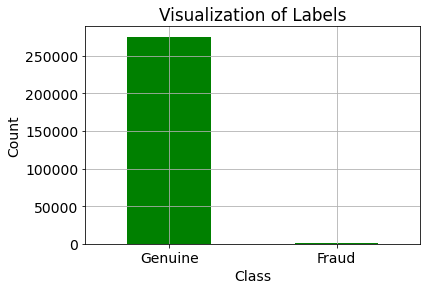

In [ ]:
labels = ['Genuine', 'Fraud']
count_classes = data.value_counts(data['Class'], sort=True)
count_classes.plot(kind='bar', rot=0, color='g')
plt.title('Visualization of Labels')
plt.ylabel('Count')
plt.xticks(range(2), labels)
plt.show()

## Train & Test Split

Before splitting train & test — we need to define dependent and independent variables. The dependent variable is also known as X and the independent variable is known as y.

In [ ]:
X = data.drop('Class', axis = 1).values
y = data['Class'].values

split our train and test data.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 1)
print(X_train)

Train data we will be used for training our model and the data which is unseen will be used for testing.

## Model Building  
We will be trying different machine learning models one by one. Defining models are much easier. A single line of code can define our model.  
And, in the same way, a single line of code can fit the model on our data.  
We can also tune these models by selecting different optimized parameters. But, if the accuracy is better even with less parameter tuning then — no need to make it complex.

### Decision Tree

In [ ]:
DT = DecisionTreeClassifier(max_depth = 4, criterion = 'entropy')
DT.fit(X_train, y_train)
tree_yhat = DT.predict(X_test)

check the accuracy of our decision tree model.

In [ ]:
print('Accuracy score of the Decision Tree model is {}'.format(accuracy_score(y_test, tree_yhat)))

Accuracy score of the Decision Tree model is 0.9991583957281328


Checking F1-Score for the decision tree model.

In [ ]:
print('F1 score of the Decision Tree model is {}'.format(f1_score(y_test, tree_yhat)))

F1 score of the Decision Tree model is 0.7542372881355933


Checking the confusion matrix:

In [ ]:
confusion_matrix(y_test, tree_yhat, labels = [0, 1])

array([[68769,    19],
       [   39,    89]], dtype=int64)

Here, the first row represents positive and the second row represents negative. So, we have 68782 as true positive and 18 are false positive. That says, out of 68782+18=68800, we have 68782 that are successfully classified as a normal transaction and 18 were falsely classified as normal — but they were fraudulent.

### K-Nearest Neighbors

In [ ]:
n = 7
KNN = KNeighborsClassifier(n_neighbors = n)
KNN.fit(X_train, y_train)
knn_yhat = KNN.predict(X_test)

Let’s check the accuracy of our K-Nearest Neighbors model.

In [ ]:
print('Accuracy score of the K-Nearest Neighbors model is {}'.format(accuracy_score(y_test, knn_yhat)))

Accuracy score of the K-Nearest Neighbors model is 0.999288989494457


Checking F1-Score for the K-Nearest Neighbors model.

In [ ]:
print('F1 score of the K-Nearest Neighbors model is {}'.format(f1_score(y_test, knn_yhat)))

F1 score of the K-Nearest Neighbors model is 0.7949790794979079


### Logistic Regression

In [ ]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_yhat = lr.predict(X_test)

Let’s check the accuracy of our Logistic Regression model.

In [ ]:
print('Accuracy score of the Logistic Regression model is {}'.format(accuracy_score(y_test, lr_yhat)))

Accuracy score of the Logistic Regression model is 0.9989552498694062


Checking F1-Score for the Logistic Regression model.

In [ ]:
print('F1 score of the Logistic Regression model is {}'.format(f1_score(y_test, lr_yhat)))

F1 score of the Logistic Regression model is 0.6666666666666666


### Support Vector Machines

In [ ]:
svm = SVC()
svm.fit(X_train, y_train)
svm_yhat = svm.predict(X_test)

Let’s check the accuracy of our Support Vector Machines model.

In [ ]:
print('Accuracy score of the Support Vector Machines model is {}'.format(accuracy_score(y_test, svm_yhat)))

Accuracy score of the Support Vector Machines model is 0.999318010331418


Checking F1-Score for the Support Vector Machines model.

In [ ]:
print('F1 score of the Support Vector Machines model is {}'.format(f1_score(y_test, svm_yhat)))

F1 score of the Support Vector Machines model is 0.7813953488372093


### Random Forest

In [ ]:
rf = RandomForestClassifier(max_depth = 4)
rf.fit(X_train, y_train)
rf_yhat = rf.predict(X_test)

Let’s check the accuracy of our Random Forest model.

In [ ]:
print('Accuracy score of the Random Forest model is {}'.format(accuracy_score(y_test, rf_yhat)))

Accuracy score of the Random Forest model is 0.9991438853096524


Checking F1-Score for the Random Forest model.

In [ ]:
print('F1 score of the Random Forest model is {}'.format(f1_score(y_test, rf_yhat)))

F1 score of the Random Forest model is 0.728110599078341


### XGBoost

In [ ]:
xgb = XGBClassifier(max_depth = 4)
xgb.fit(X_train, y_train)
xgb_yhat = xgb.predict(X_test)

Let’s check the accuracy of our XGBoost model.

In [ ]:
print('Accuracy score of the XGBoost model is {}'.format(accuracy_score(y_test, xgb_yhat)))

Accuracy score of the XGBoost model is 0.999506645771664


Checking F1-Score for the XGBoost model.

In [ ]:
print('F1 score of the XGBoost model is {}'.format(f1_score(y_test, xgb_yhat)))

F1 score of the XGBoost model is 0.8495575221238937


# Conclusion

99.95% accuracy in our credit card fraud detection. This number should not be surprising as our data was balanced towards one class. The good thing that we have noticed from the confusion matrix is that — our model is not overfitted.
Finally, based on our accuracy score — XGBoost is the winner for our case. The only catch here is the data that we have received for model training. The data features are the transformed version of PCA. If the actual features follow a similar pattern then we are doing great!!